In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Opening a new restaurant

Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

## Load Data

In [7]:
path = "data\ex1data1.txt"
data = pd.read_csv(path, header=None, names=["Population", "Profit"])

## Explorer Data Analysis

In [8]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


C:\Anaconda\lib\site-packages\matplotlib\collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


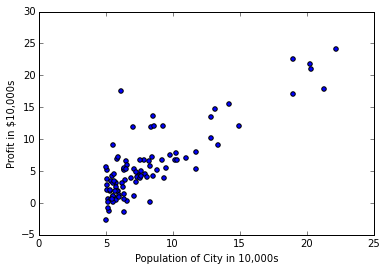

In [9]:
plt.scatter(data.Population, data.Profit)
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in $10,000s")

## Implementing Simple Linear Regression

In [10]:
def computeCost(X, y, theta):
    inner = np.power((X * theta.T) - y, 2)
    return np.sum(inner) / (2 * len(X))
# append a ones column to the front of the data set
# data.insert(0, "Ones", 1)
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]


# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

X.shape, theta.shape, y.shape

computeCost(X, y, theta)
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
    for j in range(parameters):
        term = np.multiply(error, X[:, j])
    temp[0, j] = theta[0, j] - ((alpha / len(X)) * np.sum(term))
    theta = temp
    cost[i] = yh(X, y, theta)
    return theta, cost
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 100000
# perform gradient descent to “fit” the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

ValueError: shapes (97,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)

## Viewing The Results

In [11]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, "r", label="Prediction")
ax.scatter(data.Population, data.Profit, label="Traning Data")
ax.legend(loc=2)
ax.set_xlabel("Population")
ax.set_ylabel("Profit")
ax.set_title("Predicted Profit vs. Population Size")

NameError: name 'g' is not defined

NameError: name 'iters' is not defined

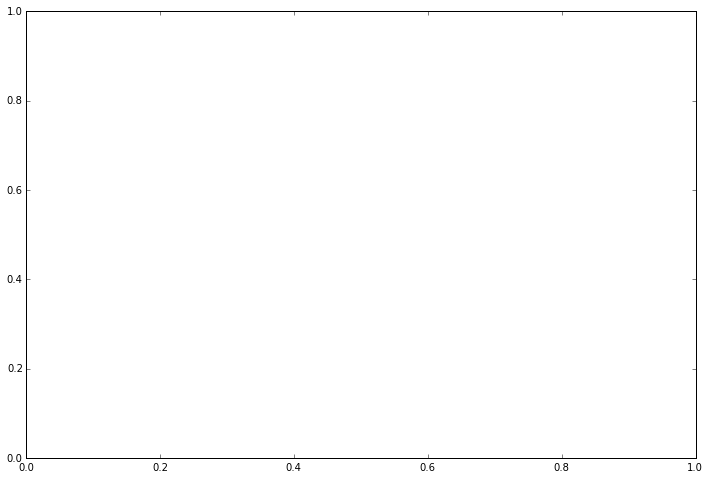

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, "r")
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.set_title("Error vs. Training Epoch")

### Source

* [Machine Learning Exercises In Python, Part 1](https://medium.com/@jdwittenauer/machine-learning-exercises-in-python-part-1-60db0df846a4#.oawwxvvs6)